# **Predictive-Analyst - Aryo Daffa Khairuddin**

### Link Dataset : [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

### Link Full Project : https://github.com/aryo04/Predictive-Analyst

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**Insigh**t :
* `pandas`: Untuk mengolah dan menganalisis data dalam format tabel.
* `numpy`: Untuk operasi angka dan array.
* `matplotlib.pyplot` dan `seaborn`: Untuk membuat grafik dan visualisasi data.
* `sklearn.preprocessing`: StandardScaler, MinMaxScaler untuk membuat data dengan skala yang berdekatan dan LabelEncoder untuk mengubah kategorikal menjadi numerik.
* `sklearn.metrics`: Untuk mengukur kinerja model seperti, classification_report dan confusion_matrix.
* `scipy.stats.zscore`: Untuk menghitung skor untuk menangani outlier.
* `sklearn.ensemble`, `sklearn.naive_bayes`, `sklearn.svm` : Algoritma machine learning untuk klasifikasi.
* `imblearn.over_sampling.SMOTE`: Untuk menangani data yang tidak seimbang.
* `sklearn.model_selection.train_test_split`: Untuk membagi data menjadi data latih dan data uji.


# **Memuat Dataset**

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Insight** :  Memuat file CSV "healthcare-dataset-stroke-data.csv" dan melihat isi awal dataset dengan menampilkan 5 baris pertama.

# **Data Understanding**

In [3]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 5110
Jumlah kolom: 12


**Insight** : df.shape() digunakan untuk mengetahui jumlah baris dan kolom dimana dari dataset tersebut mempunyai 5110 baris dan 12 kolom.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Insight** : df.info() digunakan untuk menampilkan struktur dataset, termasuk jumlah baris baris, nama kolom, jumlah non-null, serta tipe data dari masing-masing kolom.

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Insight** : Berdasarkan statistik deskriptif, terdapat  outlier pada kolom `avg_glucose_level` dan `bmi` karena nilai maksimum keduanya jauh dari Q3.

In [6]:
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat : {duplicate_count}")

Jumlah data duplikat : 0


**Insight** : Mengecek duplikat dan hasilnya menunjukan bahwa tidak terdapat duplikat.

In [7]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


**Insight** : Mengecek missing value dan hasilnya menunjukkan bahwa terdapat missing value pada kolom `bmi` sebanyak 201 yang berarti perlu dilakukan penanganan lebih lanjut terhadap kolom bmi seperti mengisi dengan mean, median atau dihapus.

### **Exploratory Data Analysis (EDA)**

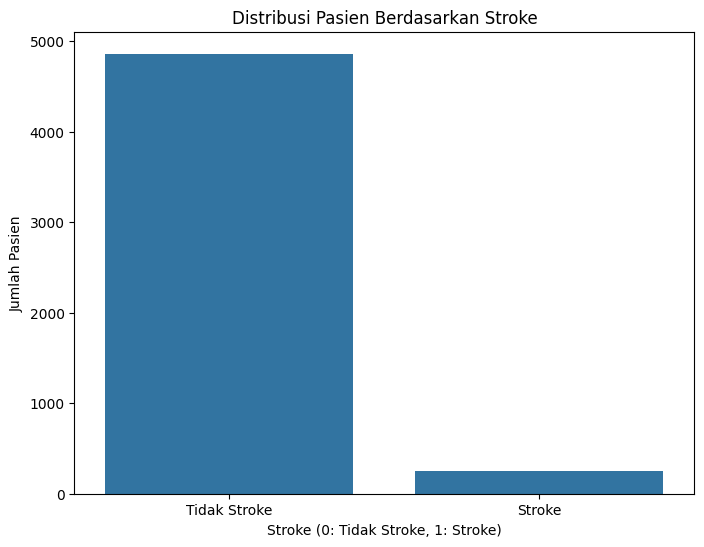

In [8]:
# Distribusi Pasien Berdasarkan Stroke
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df)
plt.title('Distribusi Pasien Berdasarkan Stroke')
plt.xlabel('Stroke (0: Tidak Stroke, 1: Stroke)')
plt.ylabel('Jumlah Pasien')
plt.xticks([0, 1], ['Tidak Stroke', 'Stroke'])
plt.show()

**Insight** :
Distribusi kelas tidak seimbang, dimana jumlah pasien dengan stroke (1) jauh lebih sedikit dibandingkan yang tidak mengalami stroke (0).

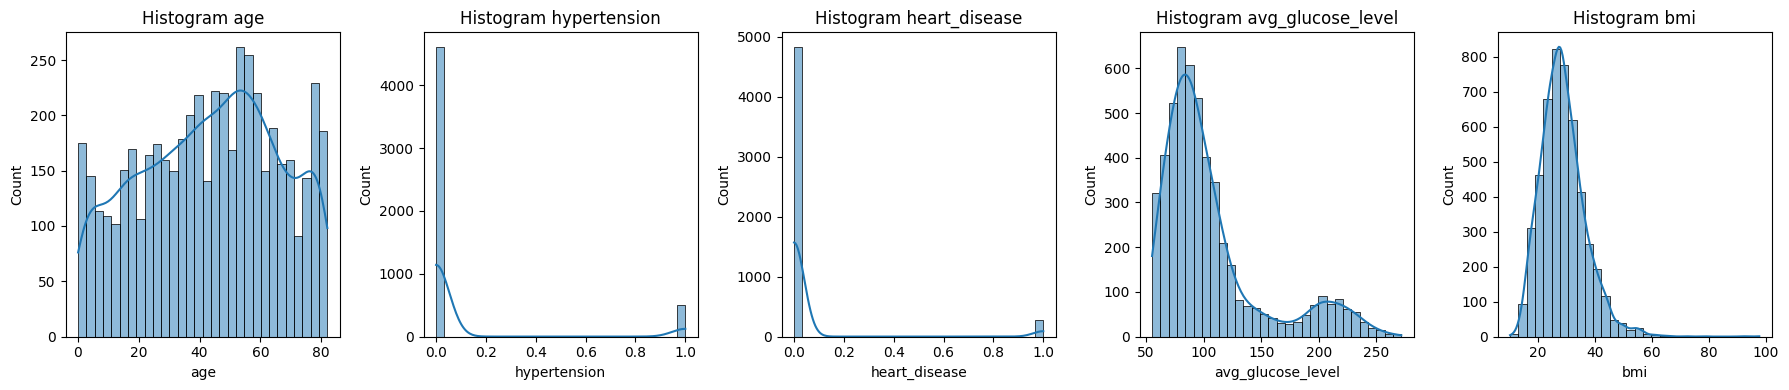

In [9]:
numeric_cols = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(18, 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
  sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
  axes[i].set_title(f"Histogram {col}")
  axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

**Insight** :

* `age`: Distribusi usia cenderung merata, dengan sedikit puncak pada usia 50–60 tahun.

* `hypertension` & `heart_disease`: Mayoritas data bernilai 0, menunjukkan sebagian besar individu tidak memiliki hipertensi atau penyakit jantung.

* `avg_glucose_level`: Distribusi condong ke kanan (right-skewed), menunjukkan ada beberapa individu dengan kadar glukosa sangat tinggi.

* `bmi`: Sebagian besar nilai berada di kisaran 20–40, tetapi ada outlier dengan nilai ekstrem mendekati 100

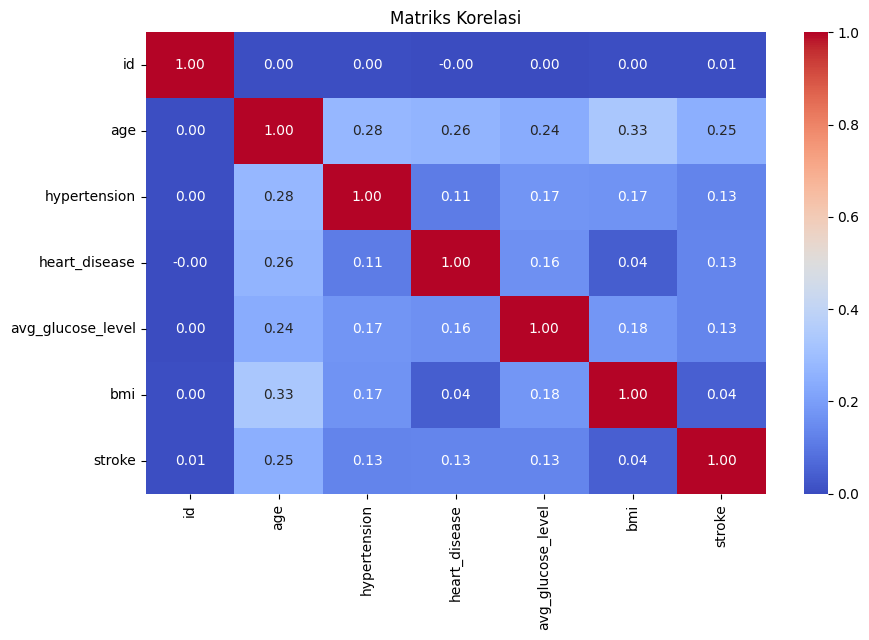

In [10]:
# Korelasi antar fitur numerik
correlation_matrix = df.corr(numeric_only=True)

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

**Insight** :

* `age` memiliki korelasi sedang dengan `bmi` (0.33), menunjukkan sedikit hubungan antara kedua fitur tersebut. `Age` juga berkorelasi positif dengan `hypertension` (0.28), `heart_disease` (0.26), `avg_glucose_level` (0.24), dan `stroke` (0.25), yang berarti makin bertambah usia cenderung meningkatkan risiko terhadap variabel-variabel tersebut.

* `hypertension`, `heart_disease`, dan `avg_glucose_level` memiliki korelasi rendah satu sama lain, tetapi semua memiliki korelasi positif kecil dengan `stroke` (~0.13), menunjukkan kontribusi lemah terhadap risiko stroke.

* `bmi` berkorelasi sedang dengan age (0.33), namun sangat lemah dengan variabel lain, termasuk stroke (0.04), sehingga pengaruhnya sangat kecil.

<ipython-input-11-61f3a896964c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
<ipython-input-11-61f3a896964c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
<ipython-input-11-61f3a896964c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
<ipython-input-11-61f3a896964c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is

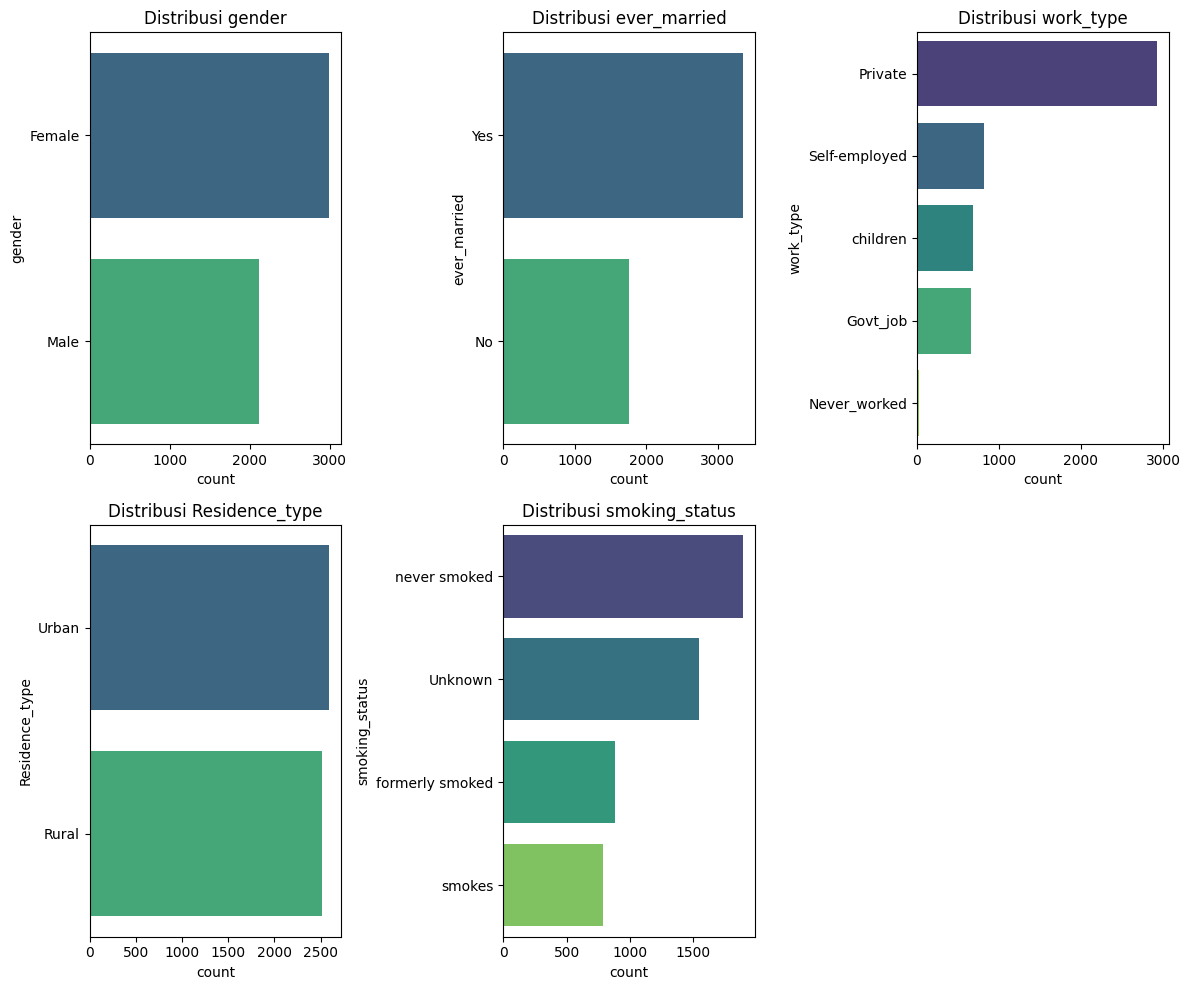

In [11]:
df = df[df['gender'] != 'Other']

df = df.reset_index(drop=True)

categorical_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

**Insight** :

* `gender`: Jenis kelamin perempuan lebih banyak dibandingkan laki-laki.

* `ever_married`: Sebagian besar individu sudah pernah menikah,yang menunjukkan usia individu cenderung dewasa.

* `work_type`: Mayoritas individu tidak menyebutkan pekerjaannya (Private), kemudian Self-employed, childern, Govt_job, dan yang paling sedikit adalah yang belum pernah bekerja.

* `Residence_type`: Individu dari daerah Urban sedikit lebih banyak daripada Rural.

* `smoking_status`: Mayoritas individu tidak pernah merokok, diikuti oleh status Unknown, lalu formerly smoked, dan paling sedikit smokes.

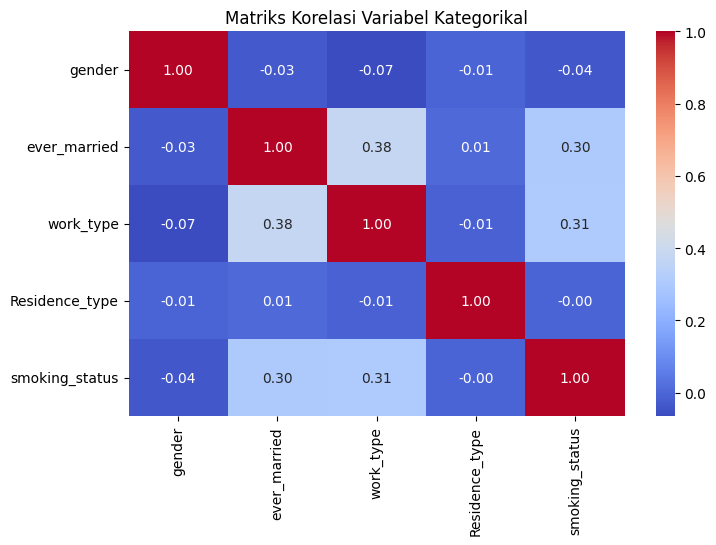

In [12]:
# Korelasi antar fitur Kategorikal
plt.figure(figsize=(8, 5))
categorical_encoded = df[categorical_cols].apply(lambda x: pd.factorize(x)[0])  # Encode variabel kategorikal
sns.heatmap(categorical_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Variabel Kategorikal")
plt.show()

**Insight** :

* `gender` tidak memiliki korelasi yang signifikan dengan fitur lain. Nilai korelasinya mendekati nol terhadap semua fitur.

* `ever_married` memiliki korelasi sedang dengan `work_type` (0.38) dan `smoking_status` (0.30), menunjukkan bahwa status pernikahan sedikit berhubungan dengan jenis pekerjaan dan status merokok.

* `work_type` juga menunjukkan korelasi sedang dengan `smoking_status` (0.31),yang mengindikasikan bahwa jenis pekerjaan sedikit berhubungan dengan status merokok.

* `Residence_type` tidak berkorelasi dengan fitur manapun, yang berarti tipe tempat tinggal tidak berpengaruh terhadap fitur kategorikal lainnya.

* `smoking_status` memiliki korelasi sedang dengan `ever_married`(0.30) dan `work_type`(0.31), namun korelasinya dengan fitur lain sangat rendah.

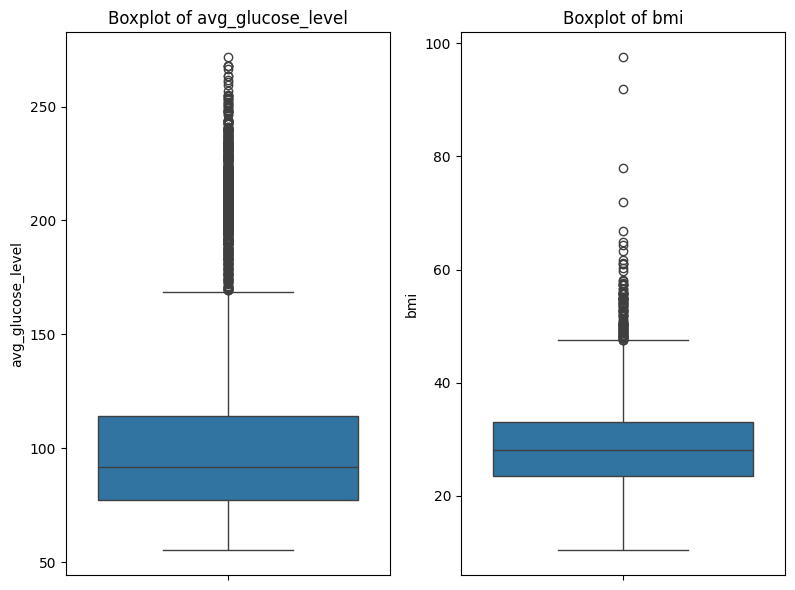

In [13]:
numerical_features = [ "avg_glucose_level", "bmi"]

# Visualisasi outlier sebelum ditangani
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**Insight** :
fitur `avg_glucose_level` dan `bmi` mengandung banyak outlier. `avg_glucose_level` memiliki data ekstrem di atas 250, sementara `bmi` mencapai hampir 100. Keberadaan outlier ini menyebabkan distribusi data menjadi tidak seimbang

# **Data Preparation**

In [14]:
df.drop('id', axis=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5105,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**insight** :
Kolom id dihapus dari dataset karena hanya nomor unik yang tidak memiliki nilai prediktif terhadap risiko stroke.

In [15]:
# Menghapus baris dengan missing values di kolom 'bmi'
df = df[df['bmi'].notna()]

# Mengecek apakah masih ada missing value
print(df.isna().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


**Insight** :
Missing value pada kolom bmi dihapus karena persentase hanya sedikit missing value-nya dan menghapusnya tidak akan signifikan mengurangi jumlah data.

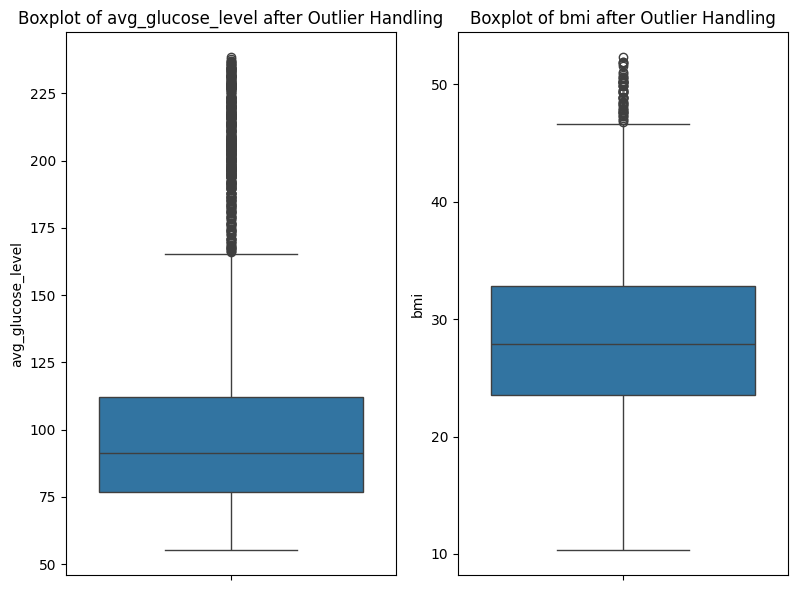

In [16]:
# Menyalin dataset
df_zscore = df.copy()

# Kolom numerik yang akan dicek outlier-nya
numeric_cols_outlier = ["avg_glucose_level", "bmi"]

# Menghitung Z-score untuk setiap kolom numerik
for col in numeric_cols_outlier:
    df_zscore[col + '_zscore'] = zscore(df_zscore[col])

# Menentukan threshold Z-score (misalnya, 3)
threshold = 3

# Menghapus outlier berdasarkan threshold Z-score
df_zscore = df_zscore[(df_zscore[numeric_cols_outlier[0] + '_zscore'].abs() <= threshold) &
                     (df_zscore[numeric_cols_outlier[1] + '_zscore'].abs() <= threshold)]

# Menghapus kolom Z-score tambahan
df_zscore = df_zscore.drop(columns=[col + '_zscore' for col in numeric_cols_outlier])

# Visualisasi outlier setelah ditangani
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df_zscore[col])
    plt.title(f'Boxplot of {col} after Outlier Handling')
plt.tight_layout()
plt.show()

**Insight** :
Setelah menangani outlier menggunakan metode Z-score dengan threshold 3, terlihat bahwa nilai-nilai ekstrem pada fitur `avg_glucose_level` dan `bmi` masih tetap muncul dalam visualisasi boxplot, namun jumlahnya telah berkurang. Hal ini menunjukkan bahwa penerapan Z-score dengan ambang ±3 berhasil mengidentifikasi dan menghapus sebagian besar data yang menyimpang secara signifikan dari distribusi normalnya.

In [17]:
# Daftar kolom kategorikal yang akan diencoding
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Membuat salinan dataset untuk encoding
df_encoded = df_zscore.copy()

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded[categorical_cols].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2
5,1,1,2,1,1


**Insght** :
Proses label encoding dilakukan untuk mengubah nilai kategorikal menjadi format numerik agar bisa diproses oleh algoritma machine learning. Setiap nilai pada kolom `gender`, `ever_married`, `work_type`, `Residence_type`, dan `smoking_status` dikonversi menjadi angka. Hasil encoding disimpan dalam dictionary label_encoders untuk memudahkan konversi balik jika diperlukan.










In [18]:
# Daftar kolom numerik yang akan dinormalisasi
numeric_cols_to_normalize = ["age", "avg_glucose_level", "bmi"]

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Membuat salinan dataset untuk normalisasi
df_normalized = df_encoded.copy()

# Menerapkan normalisasi pada kolom numerik
df_normalized[numeric_cols_to_normalize] = scaler.fit_transform(df_normalized[numeric_cols_to_normalize])

# Menampilkan beberapa baris pertama dari dataset setelah normalisasi
df_normalized[numeric_cols_to_normalize].head()

,age,avg_glucose_level,bmi
0,0.816895,0.946350,0.626190
2,0.975586,0.276975,0.528571
3,0.597168,0.633063,0.573810
4,0.963379,0.648820,0.326190
5,0.987793,0.714737,0.445238


**Insight** :
Dilakukan normalisasi dengan MinMaxScaler untuk menyetarakan skala nilai pada kolom numerik `age`, `avg_glucose_level`, dan `bmi` ke rentang 0 hingga 1.

In [19]:
X = df_normalized.drop('stroke', axis=1)
y = df_normalized['stroke']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

**Insight** :
Data diseimbangkan menggunakan teknik SMOTE (Synthetic Minority Oversampling Technique) untuk mengatasi ketidakseimbangan kelas antara pasien dengan stroke (minoritas) dan tanpa stroke (mayoritas). Setelah itu, dataset dibagi menjadi data latih (70%) dan data uji (30%). Penyeimbangan diperlukan untuk meningkatkan sensitivitas model terhadap kasus stroke.

# **Modeling**

In [20]:
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Insight** :
Melatih model menggunakan Random Forest.

In [21]:
gnb_classifier = GaussianNB(var_smoothing=1e-9)
gnb_classifier.fit(X_train, y_train)

GaussianNB()

**Insight** :
Melatih model menggunakan Naive Bayes.


In [22]:
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

**Insight** :
Melatih model menggunakan XGBoost.

# **Evaluasi Model**

In [23]:
# Daftar model dan namanya
models = {
    "Random Forest Classifier": rf_classifier,
    "Gaussian Naive Bayes Classifier": gnb_classifier,
    "XGBoost Classifier": xgb_classifier
}

# Loop melalui setiap model untuk prediksi dan evaluasi
for name, model in models.items():
    # Membuat prediksi pada set pengujian
    y_pred = model.predict(X_test)

    # Mengevaluasi model
    print(f"{name}:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("=" * 55) # Pemisah antar model

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1395
           1       0.92      0.96      0.94      1362

    accuracy                           0.94      2757
   macro avg       0.94      0.94      0.94      2757
weighted avg       0.94      0.94      0.94      2757

Confusion Matrix:
 [[1276  119]
 [  53 1309]]
Accuracy: 0.9376133478418571
Gaussian Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.92      0.46      0.62      1395
           1       0.64      0.96      0.76      1362

    accuracy                           0.71      2757
   macro avg       0.78      0.71      0.69      2757
weighted avg       0.78      0.71      0.69      2757

Confusion Matrix:
 [[ 646  749]
 [  55 1307]]
Accuracy: 0.7083786724700761
XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1395
        

**Insight** :
1. Random Forest menjadi algoritma dengan performa kedua terbaik dengan akurasi sebesar 93,76%, precision dan recall yang juga tinggi dan seimbang untuk kedua kelas. F1-score yang mendekati nilai sempurna membuktikan bahwa model ini cukup handal untuk diterapkan dalam sistem deteksi risiko stroke. Hasil confusion matrix menunjukkan bahwa model mampu mengidentifikasi pasien berisiko tinggi dengan tingkat kesalahan yang rendah. Meskipun sedikit di bawah XGBoost, Random Forest tetap layak dijadikan alternatif utama.

2. Gaussian Naive Bayes memberikan akurasi paling rendah yaitu 70,84%. Meskipun recall untuk kelas berisiko tinggi (1) cukup tinggi yaitu 96%, namun precision-nya sangat rendah (64%), sehingga model cenderung memberikan banyak false positive (kesalahan dalam memprediksi seseorang berisiko tinggi padahal tidak). Kinerja yang tidak seimbang ini membuat Naive Bayes kurang cocok untuk kasus prediksi risiko stroke, terutama bila diterapkan dalam sistem pendukung keputusan medis yang menuntut akurasi tinggi dan konsistensi.

3. XGBoost menunjukkan performa terbaik secara keseluruhan dengan akurasi sebesar 95,13%, precision dan recall seimbang di angka 94–97%, serta f1-score tinggi untuk kedua kelas (berisiko dan tidak berisiko). Kemampuan XGBoost dalam mengklasifikasikan data dengan presisi dan sensitivitas yang tinggi menjadikannya sangat cocok untuk deteksi dini risiko stroke. Confusion matrix juga menunjukkan bahwa model ini mampu meminimalkan false negative maupun false positive secara seimbang.
